<a href="https://colab.research.google.com/github/KhamdGek/ML-W-PYTHON/blob/master/ML_descisiontreeVSrandomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns     
sns.set()
import statsmodels as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning
from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree
from sklearn.ensemble import RandomForestRegressor # ensemble methods for regression
from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error
from sklearn import preprocessing  # for data preprocessing and scaling
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving auto-mpg.csv to auto-mpg (2).csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
df1 = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))

In [ ]:
df1.drop(df1.columns[9:],axis=1,inplace=True)
df2.drop(df2.columns[9:],axis=1,inplace=True)
df3.drop(df3.columns[9:],axis=1,inplace=True)

In [ ]:
df1.head() 
# mpg - Milieage/Miles Per Galon
# cylinders - the power unit of the car where gasoline is turned into power
# displacement - engine displacement of the car
# horsepower - rate of the engine performance
# weight - the weight of a car
# acceleration - the acceleration of a car
# model - model of the car
# origin - the origin of the car 
# car - the name of the car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
# we can see that the odd value is '?' representing null
# so we now change it to NaN value and fill the spot with the mean horsepower
df1.horsepower = df1.horsepower.str.replace('?','NaN').astype(float)
df1.horsepower.fillna(df1.horsepower.mean(),inplace=True)
df1.horsepower = df1.horsepower.astype(int)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car           398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [ ]:
# won't be needing the car column so we drop it
df1 = df1.drop('car',axis=1)
# check for duplicates and null values
print('sum of duplicated values: {}\n'.format(df1.duplicated().sum()))
print('sum of null values: {}'.format(df1.isnull().sum()))

sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
dtype: int64


In [ ]:
# let's print the summary statistics of the data
display(df1.describe())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


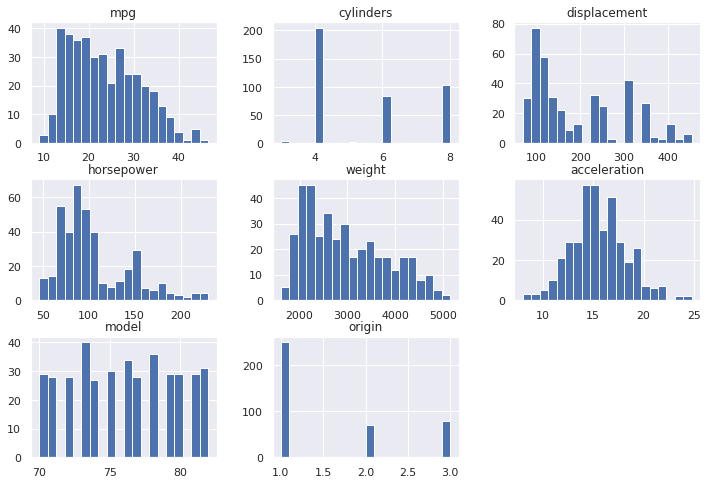

In [ ]:
# let's visualize the distribution of the features of the cars
df1.hist(figsize=(12,8),bins=20)
plt.show()

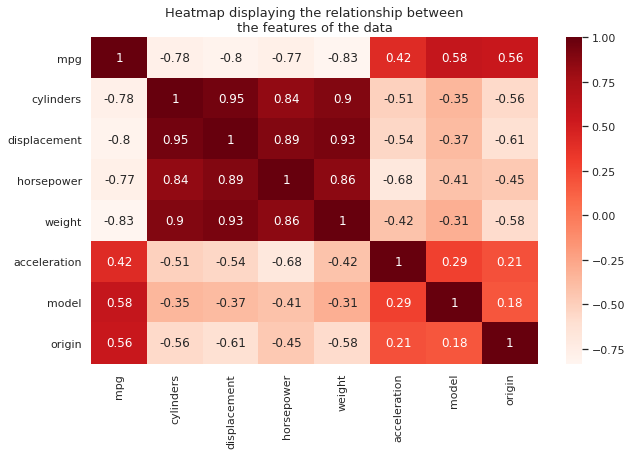

In [ ]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and....
#.... the other features.
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [ ]:
# Let's drop the columns that highly correlate with each other
newcars = df1.drop(['cylinders','displacement','weight'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity
# Let's do the variance inflation factor method again after doing a feature selection....


In [ ]:
X1 = sm.tools.add_constant(df1) 
X1.head()

,const,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,1.0,18.0,8,307.0,130,3504,12.0,70,1
1,1.0,15.0,8,350.0,165,3693,11.5,70,1
2,1.0,18.0,8,318.0,150,3436,11.0,70,1
3,1.0,16.0,8,304.0,150,3433,12.0,70,1
4,1.0,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
X = newcars.drop('mpg',axis=1)  # create a DataFrame of independent variables
y = newcars.mpg   # create a series of the dependent variable


In [ ]:
X.head()

,horsepower,acceleration,model,origin
0,130,12.0,70,1
1,165,11.5,70,1
2,150,11.0,70,1
3,150,12.0,70,1
4,140,10.5,70,1


In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
# split the unscaled/original X and y data into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [ ]:
# split the unscaled/original X and y data into training and testing data
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(X,y,test_size=.2)

In [ ]:
# split the unscaled/original X and y data into training and testing data
xtrain3,xtest3,ytrain3,ytest3 = train_test_split(X,y,test_size=.2)

In [ ]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters


In [ ]:
tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search
tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_sa

In [ ]:
tree_search2 = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search
tree_search2.fit(xtrain2,ytrain2)   # fit the model

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_sa

In [ ]:
tree_search3 = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search
tree_search3.fit(xtrain3,ytrain3)   # fit the model

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_sa

In [ ]:
tree_pred = tree_search.predict(xtest)  # make predictions with the model

In [ ]:
tree_pred2 = tree_search2.predict(xtest2)  # make predictions with the model

In [ ]:
tree_pred3 = tree_search3.predict(xtest3)  # make predictions with the model

In [ ]:
number_list = [tree_search3.score(xtrain3,ytrain3),tree_search2.score(xtrain2,ytrain2),tree_search.score(xtrain,ytrain)]
avg = sum(number_list)/len(number_list)
print("The average train score is ", round(avg,2))
number_list2 = [tree_search3.score(xtest3,ytest3),tree_search2.score(xtest2,ytest2),tree_search.score(xtest,ytest)]
avg = sum(number_list2)/len(number_list2)
print("The average test score is ", round(avg,2))
number_list3 = [(r2_score(ytest3,tree_pred3)),(r2_score(ytest2,tree_pred2)),(r2_score(ytest,tree_pred))]
avg = sum(number_list3)/len(number_list3)
print("The average overall model accuracy score is ", round(avg,2))

The average train score is  0.86
The average test score is  0.75
The average overall model accuracy score is  0.75


In [ ]:
# we now fit a RandomForestRegressor model and perform a grid search to find the best 
# parameters
forest = RandomForestRegressor()
# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]

In [ ]:
forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,n_iter=50)     # initialize the search 
forest_search.fit(xtrain,ytrain)  # fit the model
forest_pred = forest_search.predict(xtest)  # make prediction with the model

In [ ]:
forest_search2 = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,n_iter=50)     # initialize the search 
forest_search2.fit(xtrain2,ytrain2)  # fit the model
forest_pred2 = forest_search2.predict(xtest2)  # make prediction with the model

In [ ]:
forest_search3 = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,n_iter=50)     # initialize the search 
forest_search3.fit(xtrain3,ytrain3)  # fit the model
forest_pred3 = forest_search3.predict(xtest3)  # make prediction with the model

In [ ]:
number_list4 = [(forest_search.score(xtrain,ytrain)),(forest_search2.score(xtrain2,ytrain2)),(forest_search3.score(xtrain3,ytrain3))]
avg = sum(number_list4)/len(number_list4)
print("The average train score is ", round(avg,2))
number_list5 = [forest_search3.score(xtest3,ytest3),forest_search2.score(xtest2,ytest2),forest_search.score(xtest,ytest)]
avg = sum(number_list5)/len(number_list5)
print("The average test score is ", round(avg,2))
number_list6 = [r2_score(ytest3,forest_pred3),r2_score(ytest2,forest_pred2),r2_score(ytest,forest_pred)]
avg = sum(number_list6)/len(number_list6)
print("The average overall model accuracy score is ", round(avg,2))

The average train score is  0.93
The average test score is  0.86
The average overall model accuracy score is  0.86
